In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Cardiotocographic.csv')

df.head()

df.isnull().sum()

df.fillna(df.median(), inplace=True)

df['LB'] = pd.to_numeric(df['LB'], errors='coerce')

from scipy.stats import zscore


z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df_no_outliers = df[(z_scores < 3).all(axis=1)]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
stat_summary = df.describe()


print(stat_summary)


skewness = df.skew()
kurtosis = df.kurt()

print("Skewness of the data:\n", skewness)
print("Kurtosis of the data:\n", kurtosis)


                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003204     0.009894     0.004391     0.001895   
std      11.214379     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63

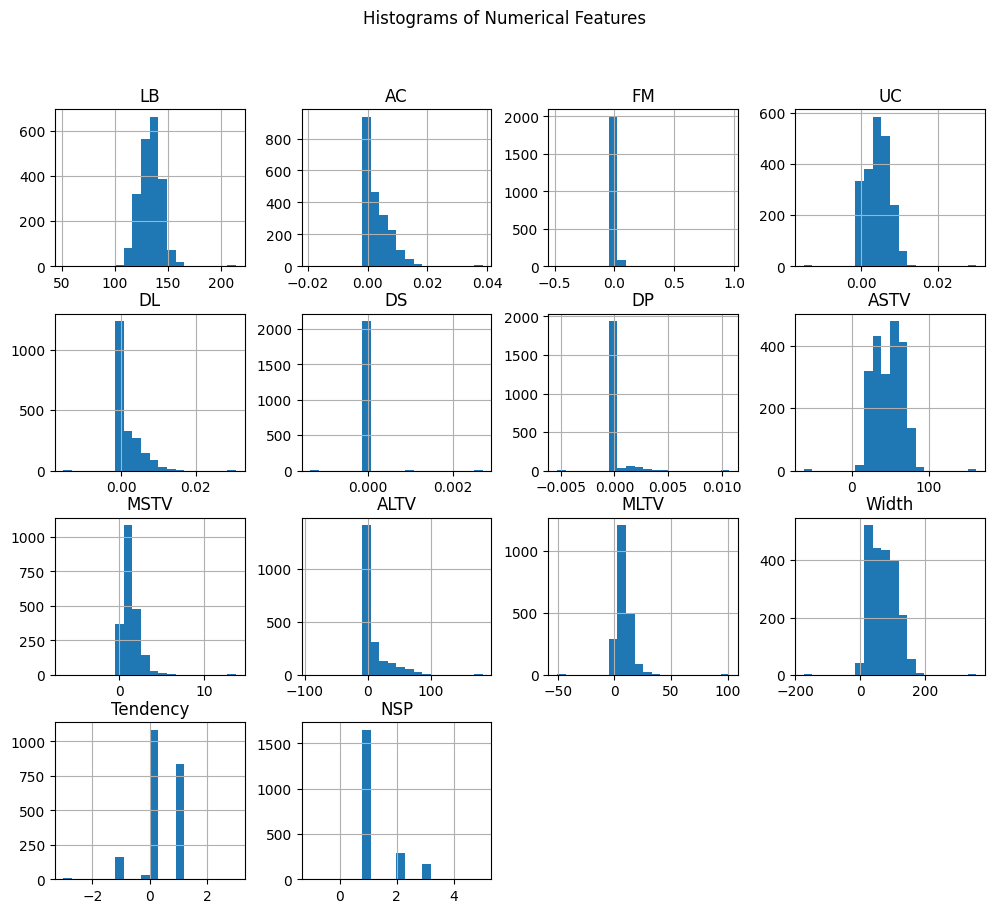

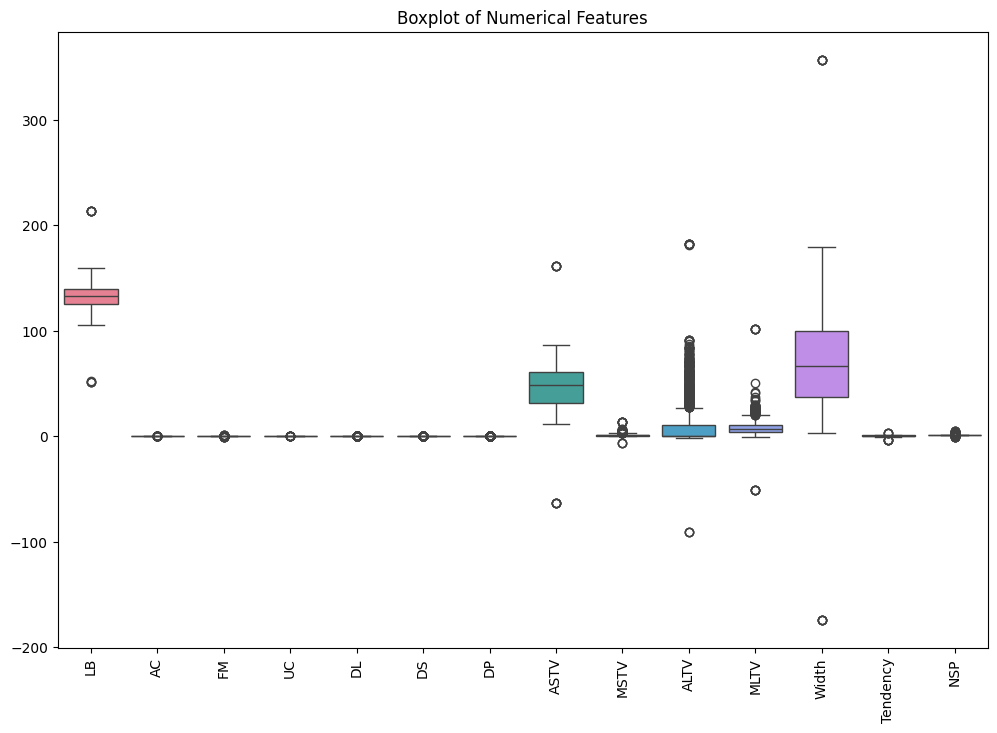

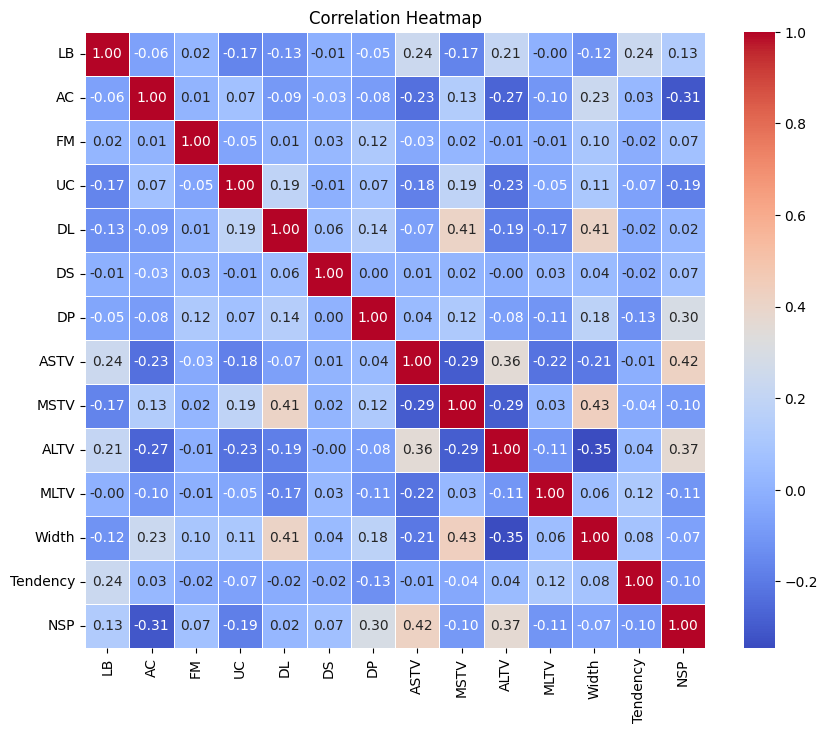

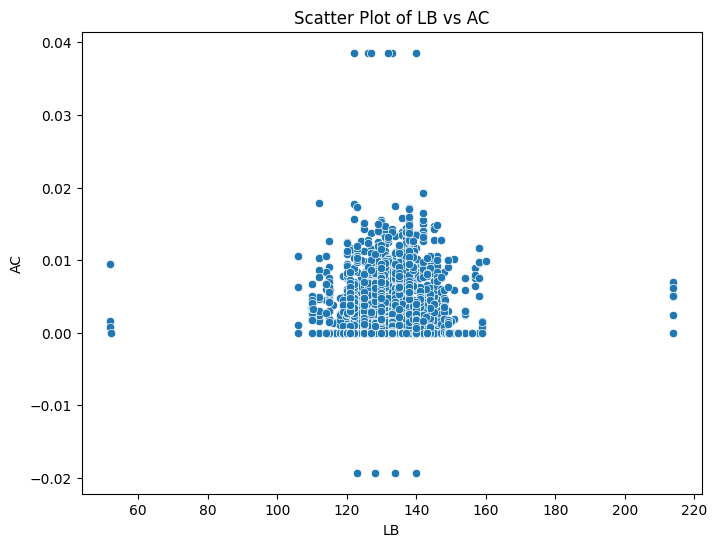

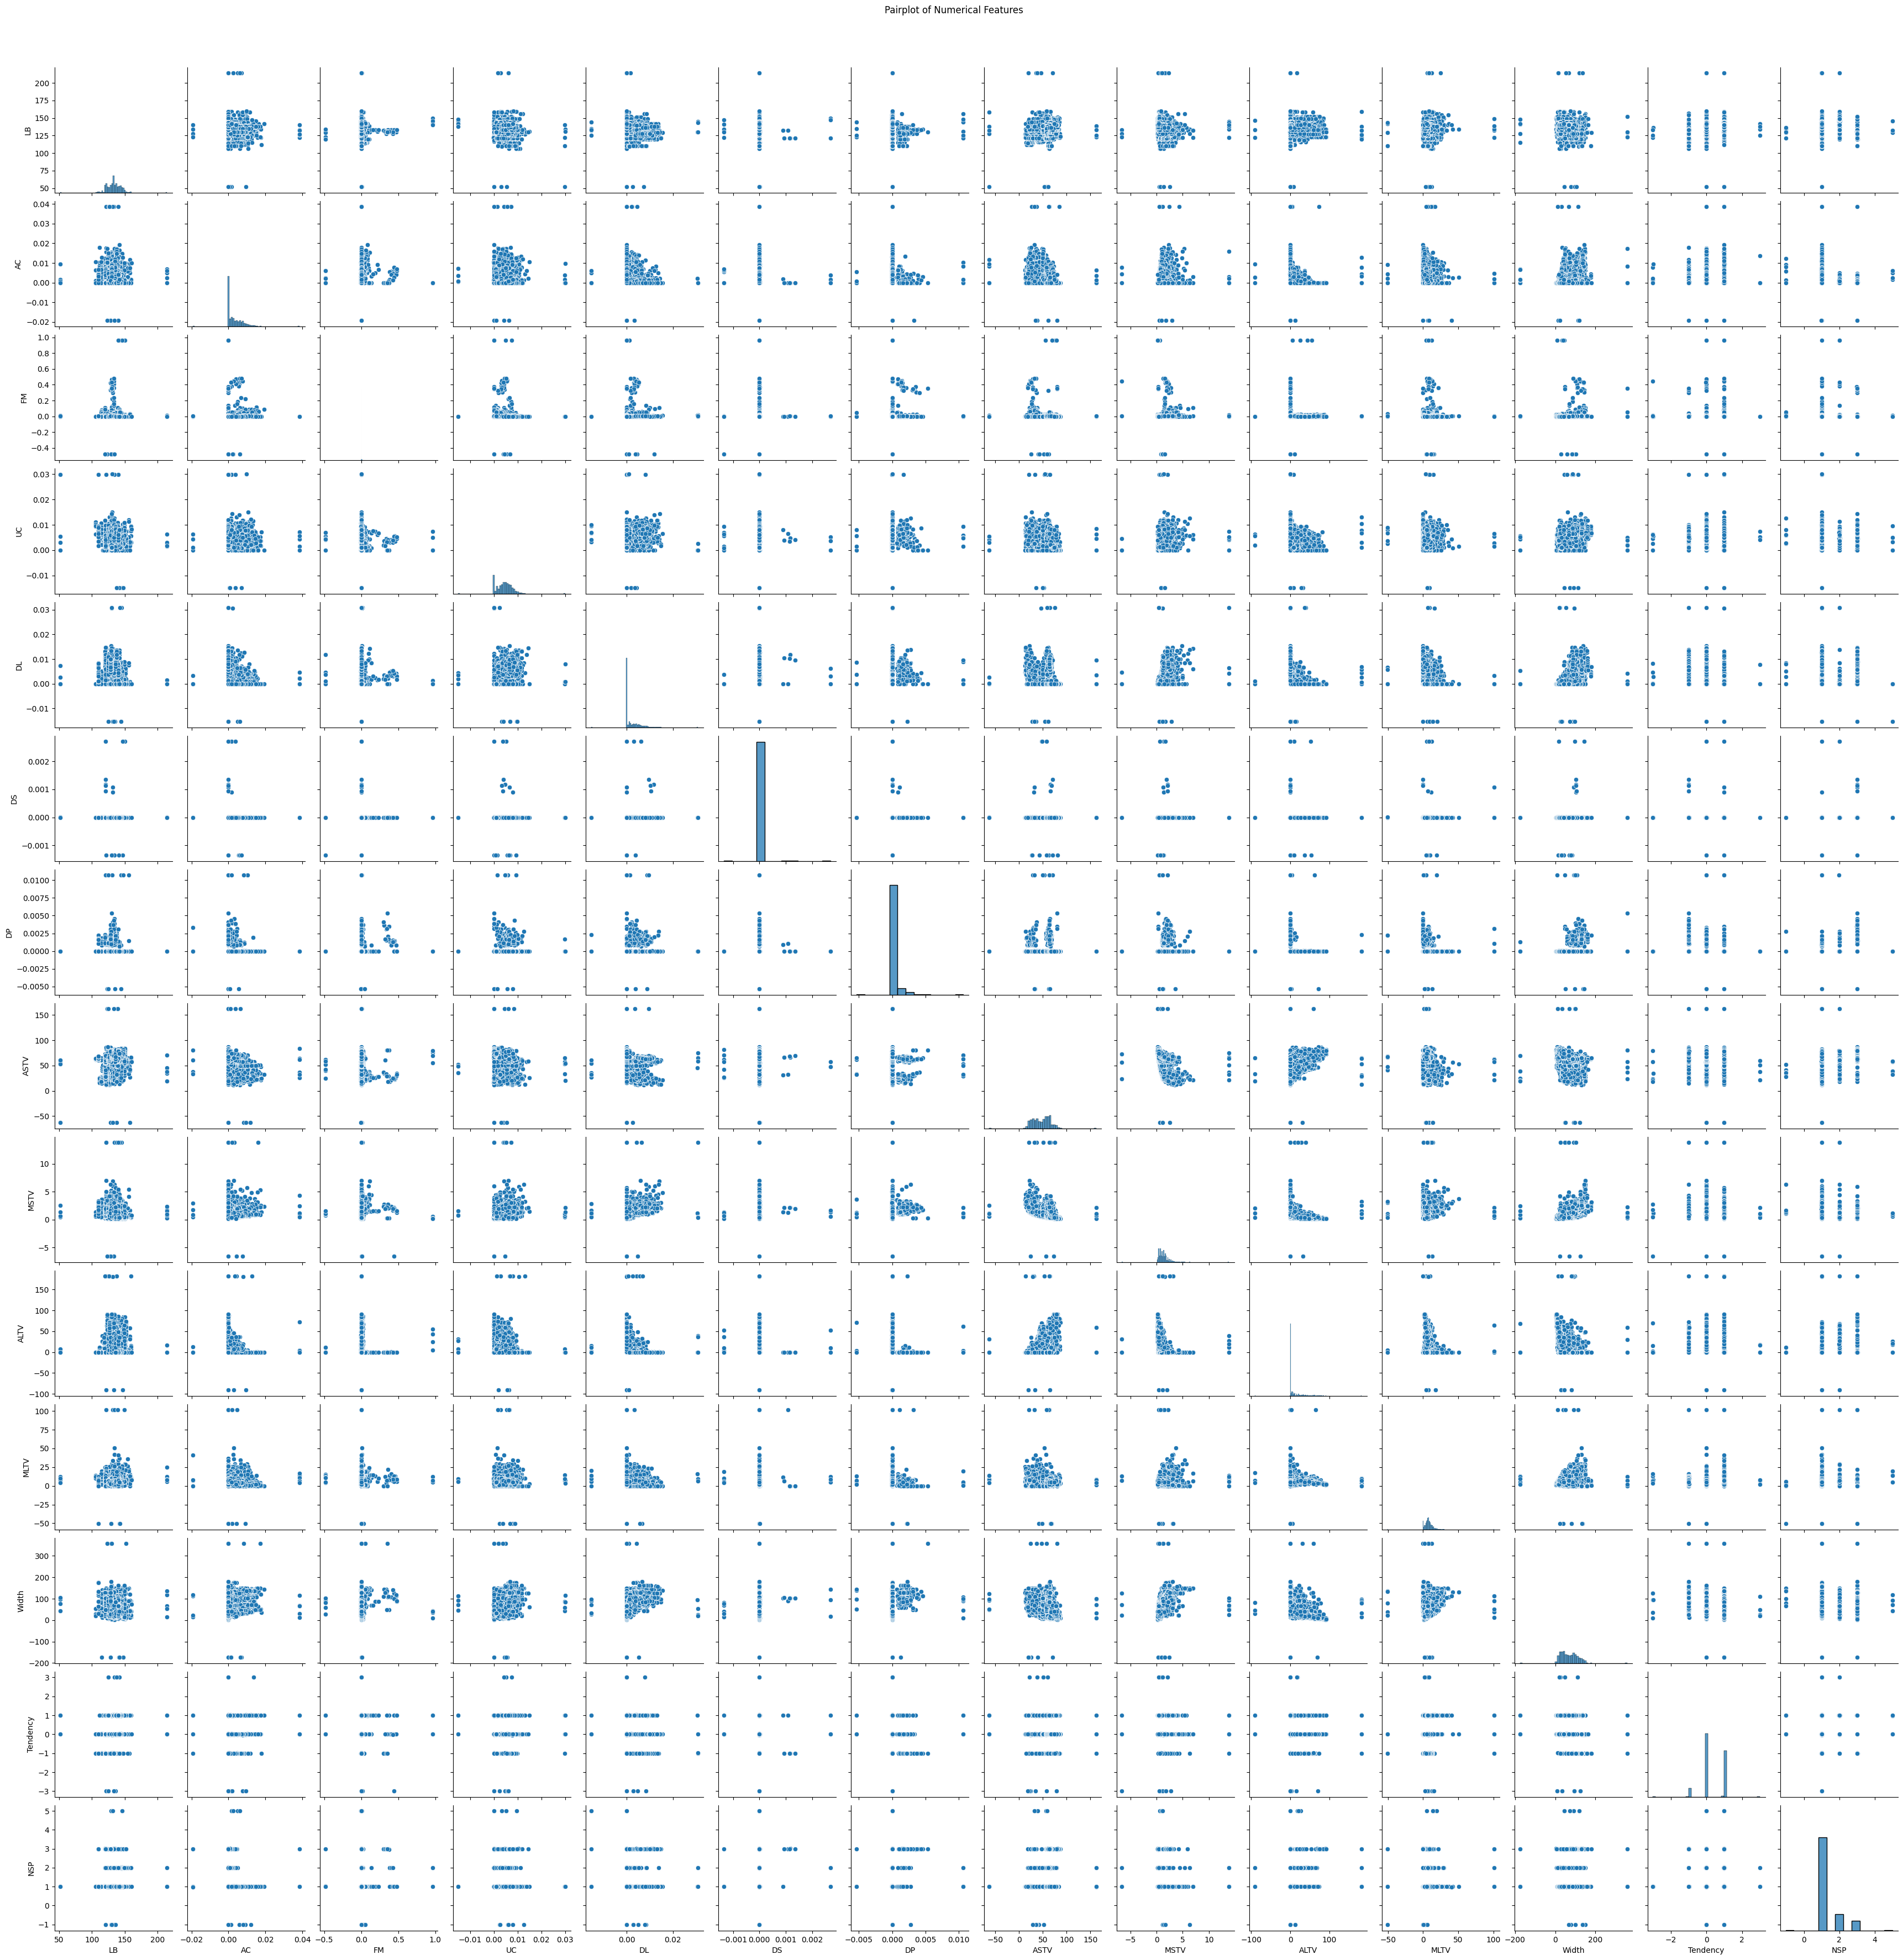

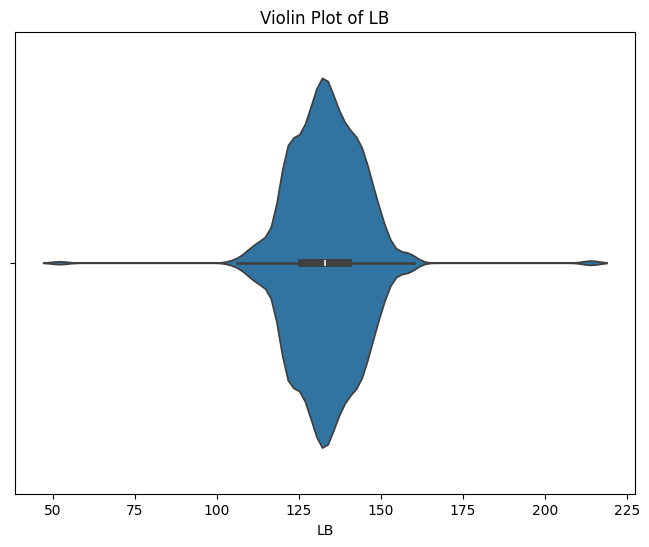

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LB', y='AC')
plt.title('Scatter Plot of LB vs AC')
plt.show()

sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='LB')
plt.title('Violin Plot of LB')
plt.show()


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

correlations = df.corr()['LB'].sort_values(ascending=False)
print(correlations)


                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062813  0.018807 -0.166229 -0.126563 -0.005432   
AC       -0.062813  1.000000  0.009768  0.071621 -0.093449 -0.033088   
FM        0.018807  0.009768  1.000000 -0.053226  0.009718  0.029916   
UC       -0.166229  0.071621 -0.053226  1.000000  0.190128 -0.006938   
DL       -0.126563 -0.093449  0.009718  0.190128  1.000000  0.058413   
DS       -0.005432 -0.033088  0.029916 -0.006938  0.058413  1.000000   
DP       -0.047650 -0.083298  0.121459  0.070295  0.144717  0.004321   
ASTV      0.241857 -0.230470 -0.032691 -0.181161 -0.069361  0.008426   
MSTV     -0.169647  0.132962  0.017055  0.189406  0.410102  0.016026   
ALTV      0.210542 -0.269807 -0.011936 -0.227304 -0.186967 -0.004335   
MLTV     -0.003423 -0.104853 -0.006121 -0.049452 -0.165293  0.034367   
Width    -0.118397  0.234549  0.097282  0.107083  0.408578  0.040845   
Tendency  0.236730  0.031710 -0.017819 -0.066832 -0.023914 -0.01

# Conclusion:
Key Insights and Patterns Discovered through Exploratory Data Analysis (EDA):
Dataset Overview:

The dataset consists of blog posts and their respective categories, which could be used for text classification. Each blog post in the "Data" column is assigned a label in the "Labels" column, representing the category to which the post belongs.
Text Preprocessing:

After applying text cleaning techniques, such as converting text to lowercase, removing punctuation, tokenization, and stopword removal, we were able to reduce noise in the data and make the text suitable for further analysis.
By vectorizing the cleaned text using TF-IDF, we were able to convert the text data into numerical features that the machine learning model could process.
Sentiment Analysis:

Using the VADER Sentiment Analyzer, we were able to classify the sentiment of each blog post as positive, negative, or neutral. This classification was based on the overall emotional tone of the blog posts.
The sentiment analysis showed that the majority of the blog posts in the dataset expressed neutral sentiment, followed by positive and negative sentiments. This indicates that the content of the blogs tends to be more neutral overall.
Word Cloud Visualization:

The word cloud provided a visual representation of the most frequent words in the dataset, helping to highlight common themes and keywords in the blog posts.
By visualizing word frequency, we could see that certain common words (such as "technology", "data", "science", and "information") appeared frequently, possibly indicating the dominant topics discussed across the blog posts.
Category-wise Sentiment Distribution:

Sentiment analysis was also performed across different categories. This helped in understanding how sentiments are distributed within various categories.
The sentiment distribution across categories revealed interesting patterns about which categories tend to lean toward positive, negative, or neutral sentiments. Some categories, for example, may have a higher frequency of positive sentiment, suggesting an optimistic or informative tone, while others might have more neutral or negative sentiments based on the nature of the content (e.g., reviews, opinion articles, etc.).